In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import numpy as np
import os
from anode.conv_models import ConvODENet
from anode.discrete_models import ResNet
from experiments.dataloaders import cifar10
from viz.plots import histories_plt
from hamiltonianNN.conv_models import accuracy

classes = ('plane','car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

data_loader, test_loader = cifar10(256)


Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


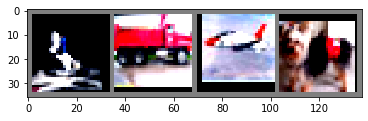

horse truck plane dog


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms



# functions to show an image
img_size = (3, 32, 32)
output_dim = 10

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(data_loader)
images, labels = dataiter.next()

dataiter_test = iter(data_loader)
images_test, labels_test = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[0:4, :,:]))
# print labels
print(' '.join ('%s' % classes[labels[j]] for j in range(4)) )

from hamiltonianNN.conv_models import ConvHamilNet,ResNet
from hamiltonianNN.training import Trainer

In [3]:
from torch.nn.init import xavier_uniform as xavier
def weight_init(model):
    classname=model.__class__.__name__
    if classname.find('Conv2d')!=-1:
        xavier(model.weight.data)
        #xavier(model.bias.data)
    elif classname.find('Linear')!=-1:
        xavier(model.weight.data)


### train models

In [ ]:
rate= [0.1,0.05,0.01,0.001]
for r in rate:
    for a in rate:

        model = ConvHamilNet(device, img_size, num_filters=64,hidden_dim=128, output_dim=10,
                non_linearity="relu",discret=True,num_layers=12,final_time=2,pool_size=2,dropout=0.2)
        
        model.apply(weight_init)
        model.to(device)

        optimizer = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=0.0)
        trainer = Trainer(model, optimizer, device,
                  classification=True,
                  print_freq=50,
                  record_freq=10,
                  verbose=True      
                 )
        trainer.train(data_loader, test_input=images_test[0:1, :,:],test_target=labels_test[0:1],num_epochs=200,R='Mix',Rrate=r,Arate=a,valid=True,valid_loader=test_loader)
        torch.save(model, './model/hamil_discret_model%.3f-R_%.3f-A'%(r,a))

/home/perm/nicolas.brunel/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  
/home/perm/nicolas.brunel/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  """



Iteration 0/196
Loss: 5.709

Iteration 50/196
Loss: 4.645

Iteration 100/196
Loss: 3.961

Iteration 150/196
Loss: 3.545
Epoch 1: 4.172

Iteration 0/196
Loss: 3.345

Iteration 50/196
Loss: 3.146

Iteration 100/196
Loss: 2.941

Iteration 150/196
Loss: 2.911
Epoch 2: 2.938

Iteration 0/196
Loss: 2.631

Iteration 50/196
Loss: 2.503

Iteration 100/196
Loss: 2.260

Iteration 150/196
Loss: 2.366
Epoch 3: 2.436

Iteration 0/196
Loss: 2.204

Iteration 50/196
Loss: 2.132

Iteration 100/196
Loss: 2.043

Iteration 150/196
Loss: 2.058
Epoch 4: 2.080

Iteration 0/196
Loss: 1.948

Iteration 50/196
Loss: 1.808

Iteration 100/196
Loss: 1.767

Iteration 150/196
Loss: 1.875
Epoch 5: 1.792

Iteration 0/196
Loss: 1.682

Iteration 50/196
Loss: 1.595

Iteration 100/196
Loss: 1.573

Iteration 150/196
Loss: 1.495
Epoch 6: 1.558

Iteration 0/196
Loss: 1.334

Iteration 50/196
Loss: 1.431

Iteration 100/196
Loss: 1.504

Iteration 150/196
Loss: 1.413
Epoch 7: 1.438

Iteration 0/196
Loss: 1.301

Iteration 50/196
L

Epoch 60: 0.804

Iteration 0/196
Loss: 0.901

Iteration 50/196
Loss: 0.759

Iteration 100/196
Loss: 0.778

Iteration 150/196
Loss: 0.899
Epoch 61: 0.800

Iteration 0/196
Loss: 0.885

Iteration 50/196
Loss: 0.822

Iteration 100/196
Loss: 0.799

Iteration 150/196
Loss: 0.766
Epoch 62: 0.798

Iteration 0/196
Loss: 0.772

Iteration 50/196
Loss: 0.705

Iteration 100/196
Loss: 0.830

Iteration 150/196
Loss: 0.719
Epoch 63: 0.794

Iteration 0/196
Loss: 0.864

Iteration 50/196
Loss: 0.816

Iteration 100/196
Loss: 0.856

Iteration 150/196
Loss: 0.722
Epoch 64: 0.793

Iteration 0/196
Loss: 0.749

Iteration 50/196
Loss: 0.789

Iteration 100/196
Loss: 0.833

Iteration 150/196
Loss: 0.710
Epoch 65: 0.788

Iteration 0/196
Loss: 0.737

Iteration 50/196
Loss: 0.740

Iteration 100/196
Loss: 0.831

Iteration 150/196
Loss: 0.723
Epoch 66: 0.786

Iteration 0/196
Loss: 0.825

Iteration 50/196
Loss: 0.781

Iteration 100/196
Loss: 0.668

Iteration 150/196
Loss: 0.831
Epoch 67: 0.784

Iteration 0/196
Loss: 0.


Iteration 150/196
Loss: 0.770
Epoch 120: 0.728

Iteration 0/196
Loss: 0.692

Iteration 50/196
Loss: 0.623

Iteration 100/196
Loss: 0.831

Iteration 150/196
Loss: 0.749
Epoch 121: 0.726

Iteration 0/196
Loss: 0.738

Iteration 50/196
Loss: 0.752

Iteration 100/196
Loss: 0.709

Iteration 150/196
Loss: 0.679
Epoch 122: 0.727

Iteration 0/196
Loss: 0.784

Iteration 50/196
Loss: 0.698

Iteration 100/196
Loss: 0.724

Iteration 150/196
Loss: 0.700
Epoch 123: 0.727

Iteration 0/196
Loss: 0.736

Iteration 50/196
Loss: 0.668

Iteration 100/196
Loss: 0.740

Iteration 150/196
Loss: 0.671
Epoch 124: 0.729

Iteration 0/196
Loss: 0.680

Iteration 50/196
Loss: 0.743

Iteration 100/196
Loss: 0.623

Iteration 150/196
Loss: 0.661
Epoch 125: 0.728

Iteration 0/196
Loss: 0.604

Iteration 50/196
Loss: 0.765

Iteration 100/196
Loss: 0.718

Iteration 150/196
Loss: 0.762
Epoch 126: 0.726

Iteration 0/196
Loss: 0.755

Iteration 50/196
Loss: 0.663

Iteration 100/196
Loss: 0.736

Iteration 150/196
Loss: 0.766
Epo


Iteration 50/196
Loss: 0.716

Iteration 100/196
Loss: 0.571

Iteration 150/196
Loss: 0.710
Epoch 180: 0.719

Iteration 0/196
Loss: 0.720

Iteration 50/196
Loss: 0.665

Iteration 100/196
Loss: 0.753

Iteration 150/196
Loss: 0.696
Epoch 181: 0.722

Iteration 0/196
Loss: 0.751

Iteration 50/196
Loss: 0.749

Iteration 100/196
Loss: 0.717

Iteration 150/196
Loss: 0.675
Epoch 182: 0.719

Iteration 0/196
Loss: 0.789

Iteration 50/196
Loss: 0.797

Iteration 100/196
Loss: 0.734

Iteration 150/196
Loss: 0.592
Epoch 183: 0.720

Iteration 0/196
Loss: 0.742

Iteration 50/196
Loss: 0.634

Iteration 100/196
Loss: 0.765

Iteration 150/196
Loss: 0.716
Epoch 184: 0.722

Iteration 0/196
Loss: 0.791

Iteration 50/196
Loss: 0.729

Iteration 100/196
Loss: 0.707

Iteration 150/196
Loss: 0.655
Epoch 185: 0.719

Iteration 0/196
Loss: 0.671

Iteration 50/196
Loss: 0.762

Iteration 100/196
Loss: 0.708

Iteration 150/196
Loss: 0.680
Epoch 186: 0.720

Iteration 0/196
Loss: 0.641

Iteration 50/196
Loss: 0.665

Ite


Iteration 50/196
Loss: 1.009

Iteration 100/196
Loss: 0.955

Iteration 150/196
Loss: 0.797
Epoch 40: 0.947

Iteration 0/196
Loss: 0.968

Iteration 50/196
Loss: 1.011

Iteration 100/196
Loss: 1.024

Iteration 150/196
Loss: 0.873
Epoch 41: 0.939

Iteration 0/196
Loss: 0.874

Iteration 50/196
Loss: 0.880

Iteration 100/196
Loss: 0.922

Iteration 150/196
Loss: 0.862
Epoch 42: 0.933

Iteration 0/196
Loss: 0.926

Iteration 50/196
Loss: 0.849

Iteration 100/196
Loss: 0.865

Iteration 150/196
Loss: 0.969
Epoch 43: 0.931

Iteration 0/196
Loss: 0.908

Iteration 50/196
Loss: 0.944

Iteration 100/196
Loss: 0.894

Iteration 150/196
Loss: 0.929
Epoch 44: 0.920

Iteration 0/196
Loss: 0.896

Iteration 50/196
Loss: 0.858

Iteration 100/196
Loss: 0.937

Iteration 150/196
Loss: 1.004
Epoch 45: 0.920

Iteration 0/196
Loss: 1.042

Iteration 50/196
Loss: 0.813

Iteration 100/196
Loss: 0.937

Iteration 150/196
Loss: 0.927
Epoch 46: 0.926

Iteration 0/196
Loss: 0.825

Iteration 50/196
Loss: 0.956

Iteration 


Iteration 50/196
Loss: 0.816

Iteration 100/196
Loss: 0.707

Iteration 150/196
Loss: 0.826
Epoch 100: 0.748

Iteration 0/196
Loss: 0.749

Iteration 50/196
Loss: 0.825

Iteration 100/196
Loss: 0.731

Iteration 150/196
Loss: 0.784
Epoch 101: 0.745

Iteration 0/196
Loss: 0.756

Iteration 50/196
Loss: 0.743

Iteration 100/196
Loss: 0.730

Iteration 150/196
Loss: 0.701
Epoch 102: 0.734

Iteration 0/196
Loss: 0.694

Iteration 50/196
Loss: 0.789

Iteration 100/196
Loss: 0.740

Iteration 150/196
Loss: 0.667
Epoch 103: 0.729

Iteration 0/196
Loss: 0.663

Iteration 50/196
Loss: 0.691

Iteration 100/196
Loss: 0.793

Iteration 150/196
Loss: 0.657
Epoch 104: 0.725

Iteration 0/196
Loss: 0.709

Iteration 50/196
Loss: 0.696

Iteration 100/196
Loss: 0.741

Iteration 150/196
Loss: 0.689
Epoch 105: 0.728

Iteration 0/196
Loss: 0.761

Iteration 50/196
Loss: 0.678

Iteration 100/196
Loss: 0.681

Iteration 150/196
Loss: 0.779
Epoch 106: 0.729

Iteration 0/196
Loss: 0.701

Iteration 50/196
Loss: 0.671

Ite


Iteration 150/196
Loss: 0.598
Epoch 159: 0.718

Iteration 0/196
Loss: 0.682

Iteration 50/196
Loss: 0.714

Iteration 100/196
Loss: 0.687

Iteration 150/196
Loss: 0.716
Epoch 160: 0.722

Iteration 0/196
Loss: 0.789

Iteration 50/196
Loss: 0.640

Iteration 100/196
Loss: 0.723

Iteration 150/196
Loss: 0.725
Epoch 161: 0.718

Iteration 0/196
Loss: 0.667

Iteration 50/196
Loss: 0.635

Iteration 100/196
Loss: 0.743

Iteration 150/196
Loss: 0.639
Epoch 162: 0.719

Iteration 0/196
Loss: 0.622

Iteration 50/196
Loss: 0.713

Iteration 100/196
Loss: 0.724

Iteration 150/196
Loss: 0.834
Epoch 163: 0.719

Iteration 0/196
Loss: 0.697

Iteration 50/196
Loss: 0.746

Iteration 100/196
Loss: 0.789

Iteration 150/196
Loss: 0.736
Epoch 164: 0.717

Iteration 0/196
Loss: 0.722

Iteration 50/196
Loss: 0.742

Iteration 100/196
Loss: 0.637

Iteration 150/196
Loss: 0.756
Epoch 165: 0.721

Iteration 0/196
Loss: 0.808

Iteration 50/196
Loss: 0.721

Iteration 100/196
Loss: 0.780

Iteration 150/196
Loss: 0.747
Epo


Iteration 100/196
Loss: 1.078

Iteration 150/196
Loss: 1.036
Epoch 19: 1.092

Iteration 0/196
Loss: 0.955

Iteration 50/196
Loss: 1.017

Iteration 100/196
Loss: 1.013

Iteration 150/196
Loss: 1.094
Epoch 20: 1.086

Iteration 0/196
Loss: 1.096

Iteration 50/196
Loss: 1.092

Iteration 100/196
Loss: 1.090

Iteration 150/196
Loss: 1.032
Epoch 21: 1.079

Iteration 0/196
Loss: 1.010

Iteration 50/196
Loss: 1.244

Iteration 100/196
Loss: 1.098

Iteration 150/196
Loss: 0.969
Epoch 22: 1.075

Iteration 0/196
Loss: 1.161

Iteration 50/196
Loss: 1.087

Iteration 100/196
Loss: 0.973

Iteration 150/196
Loss: 1.079
Epoch 23: 1.061

Iteration 0/196
Loss: 1.235

Iteration 50/196
Loss: 1.199

Iteration 100/196
Loss: 1.033

Iteration 150/196
Loss: 1.051
Epoch 24: 1.044

Iteration 0/196
Loss: 0.969

Iteration 50/196
Loss: 0.981

Iteration 100/196
Loss: 0.975

Iteration 150/196
Loss: 1.011
Epoch 25: 1.031

Iteration 0/196
Loss: 1.048

Iteration 50/196
Loss: 1.059

Iteration 100/196
Loss: 1.060

Iteration


Iteration 100/196
Loss: 0.830

Iteration 150/196
Loss: 0.775
Epoch 79: 0.759

Iteration 0/196
Loss: 0.827

Iteration 50/196
Loss: 0.771

Iteration 100/196
Loss: 0.834

Iteration 150/196
Loss: 0.741
Epoch 80: 0.764

Iteration 0/196
Loss: 0.711

Iteration 50/196
Loss: 0.771

Iteration 100/196
Loss: 0.836

Iteration 150/196
Loss: 0.757
Epoch 81: 0.754

Iteration 0/196
Loss: 0.844

Iteration 50/196
Loss: 0.670

Iteration 100/196
Loss: 0.749

Iteration 150/196
Loss: 0.722
Epoch 82: 0.755

Iteration 0/196
Loss: 0.789

Iteration 50/196
Loss: 0.754

Iteration 100/196
Loss: 0.664

Iteration 150/196
Loss: 0.734
Epoch 83: 0.755

Iteration 0/196
Loss: 0.797

Iteration 50/196
Loss: 0.687

Iteration 100/196
Loss: 0.876

Iteration 150/196
Loss: 0.830
Epoch 84: 0.757

Iteration 0/196
Loss: 0.670

Iteration 50/196
Loss: 0.884

Iteration 100/196
Loss: 0.776

Iteration 150/196
Loss: 0.794
Epoch 85: 0.754

Iteration 0/196
Loss: 0.824

Iteration 50/196
Loss: 0.819

Iteration 100/196
Loss: 0.687

Iteration


Iteration 50/196
Loss: 0.667

Iteration 100/196
Loss: 0.667

Iteration 150/196
Loss: 0.637
Epoch 139: 0.712

Iteration 0/196
Loss: 0.722

Iteration 50/196
Loss: 0.639

Iteration 100/196
Loss: 0.895

Iteration 150/196
Loss: 0.751
Epoch 140: 0.714

Iteration 0/196
Loss: 0.735

Iteration 50/196
Loss: 0.727

Iteration 100/196
Loss: 0.689

Iteration 150/196
Loss: 0.808
Epoch 141: 0.715

Iteration 0/196
Loss: 0.746

Iteration 50/196
Loss: 0.676

Iteration 100/196
Loss: 0.684

Iteration 150/196
Loss: 0.660
Epoch 142: 0.715

Iteration 0/196
Loss: 0.719

Iteration 50/196
Loss: 0.766

Iteration 100/196
Loss: 0.736

Iteration 150/196
Loss: 0.662
Epoch 143: 0.714

Iteration 0/196
Loss: 0.767

Iteration 50/196
Loss: 0.682

Iteration 100/196
Loss: 0.744

Iteration 150/196
Loss: 0.732
Epoch 144: 0.713

Iteration 0/196
Loss: 0.723

Iteration 50/196
Loss: 0.751

Iteration 100/196
Loss: 0.720

Iteration 150/196
Loss: 0.647
Epoch 145: 0.713

Iteration 0/196
Loss: 0.739

Iteration 50/196
Loss: 0.789

Ite


Iteration 150/196
Loss: 0.680
Epoch 198: 0.711

Iteration 0/196
Loss: 0.654

Iteration 50/196
Loss: 0.727

Iteration 100/196
Loss: 0.712

Iteration 150/196
Loss: 0.669
Epoch 199: 0.708

Iteration 0/196
Loss: 0.739

Iteration 50/196
Loss: 0.786

Iteration 100/196
Loss: 0.738

Iteration 150/196
Loss: 0.758
Epoch 200: 0.711

Iteration 0/196
Loss: 4.523

Iteration 50/196
Loss: 3.361

Iteration 100/196
Loss: 2.862

Iteration 150/196
Loss: 2.535
Epoch 1: 3.044

Iteration 0/196
Loss: 2.135

Iteration 50/196
Loss: 1.991

Iteration 100/196
Loss: 1.919

Iteration 150/196
Loss: 1.856
Epoch 2: 1.971

Iteration 0/196
Loss: 1.706

Iteration 50/196
Loss: 1.644

Iteration 100/196
Loss: 1.538

Iteration 150/196
Loss: 1.495
Epoch 3: 1.653

Iteration 0/196
Loss: 1.481

Iteration 50/196
Loss: 1.473

Iteration 100/196
Loss: 1.449

Iteration 150/196
Loss: 1.525
Epoch 4: 1.495

Iteration 0/196
Loss: 1.360

Iteration 50/196
Loss: 1.364

Iteration 100/196
Loss: 1.504

Iteration 150/196
Loss: 1.284
Epoch 5: 1.


Iteration 150/196
Loss: 0.745
Epoch 58: 0.791

Iteration 0/196
Loss: 0.748

Iteration 50/196
Loss: 0.776

Iteration 100/196
Loss: 0.828

Iteration 150/196
Loss: 0.852
Epoch 59: 0.790

Iteration 0/196
Loss: 0.784

Iteration 50/196
Loss: 0.767

Iteration 100/196
Loss: 0.804

Iteration 150/196
Loss: 0.765
Epoch 60: 0.786

Iteration 0/196
Loss: 0.900

Iteration 50/196
Loss: 0.778

Iteration 100/196
Loss: 0.834

Iteration 150/196
Loss: 0.799
Epoch 61: 0.784

Iteration 0/196
Loss: 0.809

Iteration 50/196
Loss: 0.777

Iteration 100/196
Loss: 0.789

Iteration 150/196
Loss: 0.841
Epoch 62: 0.779

Iteration 0/196
Loss: 0.747

Iteration 50/196
Loss: 0.738

Iteration 100/196
Loss: 0.775

Iteration 150/196
Loss: 0.771
Epoch 63: 0.776

Iteration 0/196
Loss: 0.851

Iteration 50/196
Loss: 0.730

Iteration 100/196
Loss: 0.799

Iteration 150/196
Loss: 0.777
Epoch 64: 0.775

Iteration 0/196
Loss: 0.771

Iteration 50/196
Loss: 0.840

Iteration 100/196
Loss: 0.766

Iteration 150/196
Loss: 0.886
Epoch 65: 


Iteration 100/196
Loss: 0.668

Iteration 150/196
Loss: 0.719
Epoch 118: 0.703

Iteration 0/196
Loss: 0.747

Iteration 50/196
Loss: 0.803

Iteration 100/196
Loss: 0.731

Iteration 150/196
Loss: 0.690
Epoch 119: 0.705

Iteration 0/196
Loss: 0.775

Iteration 50/196
Loss: 0.774

Iteration 100/196
Loss: 0.746

Iteration 150/196
Loss: 0.703
Epoch 120: 0.707

Iteration 0/196
Loss: 0.670

Iteration 50/196
Loss: 0.719

Iteration 100/196
Loss: 0.696

Iteration 150/196
Loss: 0.709
Epoch 121: 0.706

Iteration 0/196
Loss: 0.752

Iteration 50/196
Loss: 0.701

Iteration 100/196
Loss: 0.780

Iteration 150/196
Loss: 0.745
Epoch 122: 0.705

Iteration 0/196
Loss: 0.710

Iteration 50/196
Loss: 0.739

Iteration 100/196
Loss: 0.665

Iteration 150/196
Loss: 0.634
Epoch 123: 0.705

Iteration 0/196
Loss: 0.785

Iteration 50/196
Loss: 0.650

Iteration 100/196
Loss: 0.647

Iteration 150/196
Loss: 0.662
Epoch 124: 0.701

Iteration 0/196
Loss: 0.681

Iteration 50/196
Loss: 0.699

Iteration 100/196
Loss: 0.783

It

Epoch 177: 0.702

Iteration 0/196
Loss: 0.670

Iteration 50/196
Loss: 0.750

Iteration 100/196
Loss: 0.782

Iteration 150/196
Loss: 0.653
Epoch 178: 0.702

Iteration 0/196
Loss: 0.724

Iteration 50/196
Loss: 0.660

Iteration 100/196
Loss: 0.741

Iteration 150/196
Loss: 0.701
Epoch 179: 0.699

Iteration 0/196
Loss: 0.615

Iteration 50/196
Loss: 0.731

Iteration 100/196
Loss: 0.692

Iteration 150/196
Loss: 0.698
Epoch 180: 0.699

Iteration 0/196
Loss: 0.679

Iteration 50/196
Loss: 0.677

Iteration 100/196
Loss: 0.682

Iteration 150/196
Loss: 0.712
Epoch 181: 0.701

Iteration 0/196
Loss: 0.780

Iteration 50/196
Loss: 0.699

Iteration 100/196
Loss: 0.693

Iteration 150/196
Loss: 0.691
Epoch 182: 0.700

Iteration 0/196
Loss: 0.687

Iteration 50/196
Loss: 0.689

Iteration 100/196
Loss: 0.753

Iteration 150/196
Loss: 0.738
Epoch 183: 0.697

Iteration 0/196
Loss: 0.696

Iteration 50/196
Loss: 0.681

Iteration 100/196
Loss: 0.738

Iteration 150/196
Loss: 0.749
Epoch 184: 0.700

Iteration 0/196



Iteration 150/196
Loss: 0.831
Epoch 37: 0.898

Iteration 0/196
Loss: 0.954

Iteration 50/196
Loss: 0.854

Iteration 100/196
Loss: 0.852

Iteration 150/196
Loss: 0.952
Epoch 38: 0.901

Iteration 0/196
Loss: 0.974

Iteration 50/196
Loss: 0.844

Iteration 100/196
Loss: 0.826

Iteration 150/196
Loss: 0.874
Epoch 39: 0.897

Iteration 0/196
Loss: 0.745

Iteration 50/196
Loss: 0.893

Iteration 100/196
Loss: 0.870

Iteration 150/196
Loss: 0.891
Epoch 40: 0.884

Iteration 0/196
Loss: 0.956

Iteration 50/196
Loss: 0.924

Iteration 100/196
Loss: 0.926

Iteration 150/196
Loss: 0.814
Epoch 41: 0.883

Iteration 0/196
Loss: 0.889

Iteration 50/196
Loss: 0.923

Iteration 100/196
Loss: 0.820

Iteration 150/196
Loss: 0.904
Epoch 42: 0.873

Iteration 0/196
Loss: 0.885

Iteration 50/196
Loss: 1.035

Iteration 100/196
Loss: 0.886

Iteration 150/196
Loss: 0.944
Epoch 43: 0.872

Iteration 0/196
Loss: 0.930

Iteration 50/196
Loss: 0.840

Iteration 100/196
Loss: 0.867

Iteration 150/196
Loss: 0.854
Epoch 44: 


Iteration 150/196
Loss: 0.622
Epoch 97: 0.702

Iteration 0/196
Loss: 0.760

Iteration 50/196
Loss: 0.716

Iteration 100/196
Loss: 0.716

Iteration 150/196
Loss: 0.742
Epoch 98: 0.703

Iteration 0/196
Loss: 0.737

Iteration 50/196
Loss: 0.649

Iteration 100/196
Loss: 0.590

Iteration 150/196
Loss: 0.764
Epoch 99: 0.698

Iteration 0/196
Loss: 0.704

Iteration 50/196
Loss: 0.684

Iteration 100/196
Loss: 0.733

Iteration 150/196
Loss: 0.738
Epoch 100: 0.699

Iteration 0/196
Loss: 0.694

Iteration 50/196
Loss: 0.677

Iteration 100/196
Loss: 0.654

Iteration 150/196
Loss: 0.690
Epoch 101: 0.701

Iteration 0/196
Loss: 0.658

Iteration 50/196
Loss: 0.805

Iteration 100/196
Loss: 0.612

Iteration 150/196
Loss: 0.776
Epoch 102: 0.688

Iteration 0/196
Loss: 0.711

Iteration 50/196
Loss: 0.691

Iteration 100/196
Loss: 0.653

Iteration 150/196
Loss: 0.670
Epoch 103: 0.681

Iteration 0/196
Loss: 0.605

Iteration 50/196
Loss: 0.610

Iteration 100/196
Loss: 0.768

Iteration 150/196
Loss: 0.726
Epoch 


Iteration 50/196
Loss: 0.664

Iteration 100/196
Loss: 0.731

Iteration 150/196
Loss: 0.664
Epoch 157: 0.677

Iteration 0/196
Loss: 0.631

Iteration 50/196
Loss: 0.713

Iteration 100/196
Loss: 0.664

Iteration 150/196
Loss: 0.599
Epoch 158: 0.674

Iteration 0/196
Loss: 0.789

Iteration 50/196
Loss: 0.641

Iteration 100/196
Loss: 0.594

Iteration 150/196
Loss: 0.716
Epoch 159: 0.675

Iteration 0/196
Loss: 0.675

Iteration 50/196
Loss: 0.752

Iteration 100/196
Loss: 0.792

Iteration 150/196
Loss: 0.675
Epoch 160: 0.676

Iteration 0/196
Loss: 0.756

Iteration 50/196
Loss: 0.687

Iteration 100/196
Loss: 0.655

Iteration 150/196
Loss: 0.686
Epoch 161: 0.675

Iteration 0/196
Loss: 0.589

Iteration 50/196
Loss: 0.633

Iteration 100/196
Loss: 0.736

Iteration 150/196
Loss: 0.728
Epoch 162: 0.676

Iteration 0/196
Loss: 0.669

Iteration 50/196
Loss: 0.649

Iteration 100/196
Loss: 0.688

Iteration 150/196
Loss: 0.729
Epoch 163: 0.672

Iteration 0/196
Loss: 0.682

Iteration 50/196
Loss: 0.667

Ite

Epoch 16: 1.064

Iteration 0/196
Loss: 1.049

Iteration 50/196
Loss: 1.060

Iteration 100/196
Loss: 1.125

Iteration 150/196
Loss: 1.178
Epoch 17: 1.051

Iteration 0/196
Loss: 1.025

Iteration 50/196
Loss: 0.980

Iteration 100/196
Loss: 1.063

Iteration 150/196
Loss: 1.080
Epoch 18: 1.043

Iteration 0/196
Loss: 1.074

Iteration 50/196
Loss: 1.072

Iteration 100/196
Loss: 1.004

Iteration 150/196
Loss: 1.039
Epoch 19: 1.027

Iteration 0/196
Loss: 1.020

Iteration 50/196
Loss: 0.909

Iteration 100/196
Loss: 1.049

Iteration 150/196
Loss: 0.970
Epoch 20: 1.016

Iteration 0/196
Loss: 1.057

Iteration 50/196
Loss: 0.951

Iteration 100/196
Loss: 0.855

Iteration 150/196
Loss: 0.932
Epoch 21: 1.000

Iteration 0/196
Loss: 0.938

Iteration 50/196
Loss: 0.873

Iteration 100/196
Loss: 0.959

Iteration 150/196
Loss: 0.908
Epoch 22: 0.989

Iteration 0/196
Loss: 1.000

Iteration 50/196
Loss: 0.931

Iteration 100/196
Loss: 0.951

Iteration 150/196
Loss: 1.064
Epoch 23: 0.981

Iteration 0/196
Loss: 0.

Epoch 76: 0.714

Iteration 0/196
Loss: 0.619

Iteration 50/196
Loss: 0.676

Iteration 100/196
Loss: 0.691

Iteration 150/196
Loss: 0.836
Epoch 77: 0.714

Iteration 0/196
Loss: 0.789

Iteration 50/196
Loss: 0.760

Iteration 100/196
Loss: 0.682

Iteration 150/196
Loss: 0.733
Epoch 78: 0.711

Iteration 0/196
Loss: 0.728

Iteration 50/196
Loss: 0.698

Iteration 100/196
Loss: 0.703

Iteration 150/196
Loss: 0.738
Epoch 79: 0.711

Iteration 0/196
Loss: 0.683

Iteration 50/196
Loss: 0.673

Iteration 100/196
Loss: 0.753

Iteration 150/196
Loss: 0.651
Epoch 80: 0.710

Iteration 0/196
Loss: 0.705

Iteration 50/196
Loss: 0.738

Iteration 100/196
Loss: 0.749

Iteration 150/196
Loss: 0.697
Epoch 81: 0.710

Iteration 0/196
Loss: 0.694

Iteration 50/196
Loss: 0.710

Iteration 100/196
Loss: 0.709

Iteration 150/196
Loss: 0.641
Epoch 82: 0.709

Iteration 0/196
Loss: 0.694

Iteration 50/196
Loss: 0.713

Iteration 100/196
Loss: 0.641

Iteration 150/196
Loss: 0.768
Epoch 83: 0.701

Iteration 0/196
Loss: 0.


Iteration 100/196
Loss: 0.653

Iteration 150/196
Loss: 0.647
Epoch 136: 0.670

Iteration 0/196
Loss: 0.667

Iteration 50/196
Loss: 0.748

Iteration 100/196
Loss: 0.690

Iteration 150/196
Loss: 0.651
Epoch 137: 0.668

Iteration 0/196
Loss: 0.691

Iteration 50/196
Loss: 0.681

Iteration 100/196
Loss: 0.663

Iteration 150/196
Loss: 0.760
Epoch 138: 0.670

Iteration 0/196
Loss: 0.631

Iteration 50/196
Loss: 0.673

Iteration 100/196
Loss: 0.649

Iteration 150/196
Loss: 0.684
Epoch 139: 0.664

Iteration 0/196
Loss: 0.770

Iteration 50/196
Loss: 0.647

Iteration 100/196
Loss: 0.676

Iteration 150/196
Loss: 0.649
Epoch 140: 0.667

Iteration 0/196
Loss: 0.718

Iteration 50/196
Loss: 0.724

Iteration 100/196
Loss: 0.576

Iteration 150/196
Loss: 0.620
Epoch 141: 0.666

Iteration 0/196
Loss: 0.743

Iteration 50/196
Loss: 0.707

Iteration 100/196
Loss: 0.696

Iteration 150/196
Loss: 0.633
Epoch 142: 0.670

Iteration 0/196
Loss: 0.667

Iteration 50/196
Loss: 0.650

Iteration 100/196
Loss: 0.640

It

Epoch 195: 0.667

Iteration 0/196
Loss: 0.609

Iteration 50/196
Loss: 0.726

Iteration 100/196
Loss: 0.618

Iteration 150/196
Loss: 0.610
Epoch 196: 0.663

Iteration 0/196
Loss: 0.684

Iteration 50/196
Loss: 0.586

Iteration 100/196
Loss: 0.628

Iteration 150/196
Loss: 0.719
Epoch 197: 0.664

Iteration 0/196
Loss: 0.668

Iteration 50/196
Loss: 0.658

Iteration 100/196
Loss: 0.603

Iteration 150/196
Loss: 0.628
Epoch 198: 0.667

Iteration 0/196
Loss: 0.684

Iteration 50/196
Loss: 0.716

Iteration 100/196
Loss: 0.673

Iteration 150/196
Loss: 0.642
Epoch 199: 0.666

Iteration 0/196
Loss: 0.702

Iteration 50/196
Loss: 0.653

Iteration 100/196
Loss: 0.637

Iteration 150/196
Loss: 0.666
Epoch 200: 0.663

Iteration 0/196
Loss: 3.656

Iteration 50/196
Loss: 2.910

Iteration 100/196
Loss: 2.486

Iteration 150/196
Loss: 2.408
Epoch 1: 2.670

Iteration 0/196
Loss: 2.163

Iteration 50/196
Loss: 2.102

Iteration 100/196
Loss: 2.065

Iteration 150/196
Loss: 2.022
Epoch 2: 2.019

Iteration 0/196
Loss

Epoch 55: 0.752

Iteration 0/196
Loss: 0.707

Iteration 50/196
Loss: 0.745

Iteration 100/196
Loss: 0.762

Iteration 150/196
Loss: 0.736
Epoch 56: 0.744

Iteration 0/196
Loss: 0.729

Iteration 50/196
Loss: 0.749

Iteration 100/196
Loss: 0.606

Iteration 150/196
Loss: 0.757
Epoch 57: 0.745

Iteration 0/196
Loss: 0.746

Iteration 50/196
Loss: 0.671

Iteration 100/196
Loss: 0.810

Iteration 150/196
Loss: 0.743
Epoch 58: 0.743

Iteration 0/196
Loss: 0.833

Iteration 50/196
Loss: 0.679

Iteration 100/196
Loss: 0.724

Iteration 150/196
Loss: 0.729
Epoch 59: 0.739

Iteration 0/196
Loss: 0.833

Iteration 50/196
Loss: 0.799

Iteration 100/196
Loss: 0.671

Iteration 150/196
Loss: 0.658
Epoch 60: 0.740

Iteration 0/196
Loss: 0.686

Iteration 50/196
Loss: 0.770

Iteration 100/196
Loss: 0.784

Iteration 150/196
Loss: 0.736
Epoch 61: 0.736

Iteration 0/196
Loss: 0.697

Iteration 50/196
Loss: 0.717

Iteration 100/196
Loss: 0.797

Iteration 150/196
Loss: 0.756
Epoch 62: 0.738

Iteration 0/196
Loss: 0.


Iteration 150/196
Loss: 0.647
Epoch 115: 0.669

Iteration 0/196
Loss: 0.730

Iteration 50/196
Loss: 0.685

Iteration 100/196
Loss: 0.621

Iteration 150/196
Loss: 0.637
Epoch 116: 0.673

Iteration 0/196
Loss: 0.561

Iteration 50/196
Loss: 0.736

Iteration 100/196
Loss: 0.637

Iteration 150/196
Loss: 0.674
Epoch 117: 0.674

Iteration 0/196
Loss: 0.800

Iteration 50/196
Loss: 0.694

Iteration 100/196
Loss: 0.633

Iteration 150/196
Loss: 0.636
Epoch 118: 0.673

Iteration 0/196
Loss: 0.719

Iteration 50/196
Loss: 0.626

Iteration 100/196
Loss: 0.594

Iteration 150/196
Loss: 0.629
Epoch 119: 0.672

Iteration 0/196
Loss: 0.650

Iteration 50/196
Loss: 0.714

Iteration 100/196
Loss: 0.689

Iteration 150/196
Loss: 0.749
Epoch 120: 0.673

Iteration 0/196
Loss: 0.714

Iteration 50/196
Loss: 0.606

Iteration 100/196
Loss: 0.622

Iteration 150/196
Loss: 0.659
Epoch 121: 0.671

Iteration 0/196
Loss: 0.567

Iteration 50/196
Loss: 0.732

Iteration 100/196
Loss: 0.653

Iteration 150/196
Loss: 0.699
Epo


Iteration 50/196
Loss: 0.665

Iteration 100/196
Loss: 0.714

Iteration 150/196
Loss: 0.600
Epoch 175: 0.668

Iteration 0/196
Loss: 0.712

Iteration 50/196
Loss: 0.624

Iteration 100/196
Loss: 0.659

Iteration 150/196
Loss: 0.687
Epoch 176: 0.669

Iteration 0/196
Loss: 0.673

Iteration 50/196
Loss: 0.713

Iteration 100/196
Loss: 0.644

Iteration 150/196
Loss: 0.588
Epoch 177: 0.668

Iteration 0/196
Loss: 0.624

Iteration 50/196
Loss: 0.647

Iteration 100/196
Loss: 0.697

Iteration 150/196
Loss: 0.675
Epoch 178: 0.662

Iteration 0/196
Loss: 0.772

Iteration 50/196
Loss: 0.721

Iteration 100/196
Loss: 0.661

Iteration 150/196
Loss: 0.689
Epoch 179: 0.672

Iteration 0/196
Loss: 0.597

Iteration 50/196
Loss: 0.667

Iteration 100/196
Loss: 0.614

Iteration 150/196
Loss: 0.659
Epoch 180: 0.669

Iteration 0/196
Loss: 0.686

Iteration 50/196
Loss: 0.702

Iteration 100/196
Loss: 0.650

Iteration 150/196
Loss: 0.687
Epoch 181: 0.663

Iteration 0/196
Loss: 0.647

Iteration 50/196
Loss: 0.726

Ite


Iteration 50/196
Loss: 0.828

Iteration 100/196
Loss: 0.902

Iteration 150/196
Loss: 0.870
Epoch 35: 0.890

Iteration 0/196
Loss: 0.839

Iteration 50/196
Loss: 0.834

Iteration 100/196
Loss: 0.856

Iteration 150/196
Loss: 0.904
Epoch 36: 0.872

Iteration 0/196
Loss: 0.920

Iteration 50/196
Loss: 0.948

Iteration 100/196
Loss: 0.915

Iteration 150/196
Loss: 0.779
Epoch 37: 0.874

Iteration 0/196
Loss: 0.899

Iteration 50/196
Loss: 0.873

Iteration 100/196
Loss: 0.912

Iteration 150/196
Loss: 0.808
Epoch 38: 0.868

Iteration 0/196
Loss: 0.859

Iteration 50/196
Loss: 0.879

Iteration 100/196
Loss: 0.909

Iteration 150/196
Loss: 0.888
Epoch 39: 0.860

Iteration 0/196
Loss: 0.899

Iteration 50/196
Loss: 0.849

Iteration 100/196
Loss: 0.778

Iteration 150/196
Loss: 0.766
Epoch 40: 0.869

Iteration 0/196
Loss: 0.892

Iteration 50/196
Loss: 0.850

Iteration 100/196
Loss: 0.811

Iteration 150/196
Loss: 0.847
Epoch 41: 0.858

Iteration 0/196
Loss: 0.815

Iteration 50/196
Loss: 0.933

Iteration 


Iteration 50/196
Loss: 0.696

Iteration 100/196
Loss: 0.748

Iteration 150/196
Loss: 0.669
Epoch 95: 0.688

Iteration 0/196
Loss: 0.724

Iteration 50/196
Loss: 0.697

Iteration 100/196
Loss: 0.682

Iteration 150/196
Loss: 0.689
Epoch 96: 0.677

Iteration 0/196
Loss: 0.683

Iteration 50/196
Loss: 0.692

Iteration 100/196
Loss: 0.724

Iteration 150/196
Loss: 0.643
Epoch 97: 0.680

Iteration 0/196
Loss: 0.622

Iteration 50/196
Loss: 0.652

Iteration 100/196
Loss: 0.614

Iteration 150/196
Loss: 0.676
Epoch 98: 0.677

Iteration 0/196
Loss: 0.746

Iteration 50/196
Loss: 0.643

Iteration 100/196
Loss: 0.732

Iteration 150/196
Loss: 0.611
Epoch 99: 0.685

Iteration 0/196
Loss: 0.705

Iteration 50/196
Loss: 0.658

Iteration 100/196
Loss: 0.577

Iteration 150/196
Loss: 0.675
Epoch 100: 0.678

Iteration 0/196
Loss: 0.659

Iteration 50/196
Loss: 0.619

Iteration 100/196
Loss: 0.725

Iteration 150/196
Loss: 0.624
Epoch 101: 0.675

Iteration 0/196
Loss: 0.608

Iteration 50/196
Loss: 0.571

Iteratio


Iteration 150/196
Loss: 0.571
Epoch 154: 0.656

Iteration 0/196
Loss: 0.582

Iteration 50/196
Loss: 0.612

Iteration 100/196
Loss: 0.684

Iteration 150/196
Loss: 0.664
Epoch 155: 0.656

Iteration 0/196
Loss: 0.602

Iteration 50/196
Loss: 0.598

Iteration 100/196
Loss: 0.633

Iteration 150/196
Loss: 0.709
Epoch 156: 0.651

Iteration 0/196
Loss: 0.763

Iteration 50/196
Loss: 0.720

Iteration 100/196
Loss: 0.619

Iteration 150/196
Loss: 0.697
Epoch 157: 0.656

Iteration 0/196
Loss: 0.702

Iteration 50/196
Loss: 0.651

Iteration 100/196
Loss: 0.671

Iteration 150/196
Loss: 0.641
Epoch 158: 0.654

Iteration 0/196
Loss: 0.596

Iteration 50/196
Loss: 0.763

Iteration 100/196
Loss: 0.586

Iteration 150/196
Loss: 0.685
Epoch 159: 0.660

Iteration 0/196
Loss: 0.715

Iteration 50/196
Loss: 0.690

Iteration 100/196
Loss: 0.658

Iteration 150/196
Loss: 0.611
Epoch 160: 0.657

Iteration 0/196
Loss: 0.619

Iteration 50/196
Loss: 0.635

Iteration 100/196
Loss: 0.541

Iteration 150/196
Loss: 0.572
Epo


Iteration 50/196
Loss: 1.035

Iteration 100/196
Loss: 1.001

Iteration 150/196
Loss: 1.034
Epoch 14: 0.995

Iteration 0/196
Loss: 0.958

Iteration 50/196
Loss: 0.900

Iteration 100/196
Loss: 0.973

Iteration 150/196
Loss: 1.011
Epoch 15: 0.975

Iteration 0/196
Loss: 0.935

Iteration 50/196
Loss: 0.910

Iteration 100/196
Loss: 0.992

Iteration 150/196
Loss: 1.055
Epoch 16: 0.954

Iteration 0/196
Loss: 0.965

Iteration 50/196
Loss: 0.933

Iteration 100/196
Loss: 0.954

Iteration 150/196
Loss: 1.030
Epoch 17: 0.932

Iteration 0/196
Loss: 1.013

Iteration 50/196
Loss: 1.036

Iteration 100/196
Loss: 0.981

Iteration 150/196
Loss: 0.916
Epoch 18: 0.917

Iteration 0/196
Loss: 0.957

Iteration 50/196
Loss: 0.934

Iteration 100/196
Loss: 1.000

Iteration 150/196
Loss: 0.859
Epoch 19: 0.903

Iteration 0/196
Loss: 0.924

Iteration 50/196
Loss: 0.864

Iteration 100/196
Loss: 0.876

Iteration 150/196
Loss: 0.857
Epoch 20: 0.888

Iteration 0/196
Loss: 0.830

Iteration 50/196
Loss: 0.859

Iteration 


Iteration 50/196
Loss: 0.587

Iteration 100/196
Loss: 0.530

Iteration 150/196
Loss: 0.562
Epoch 74: 0.586

Iteration 0/196
Loss: 0.626

Iteration 50/196
Loss: 0.531

Iteration 100/196
Loss: 0.603

Iteration 150/196
Loss: 0.555
Epoch 75: 0.586

Iteration 0/196
Loss: 0.602

Iteration 50/196
Loss: 0.557

Iteration 100/196
Loss: 0.639

Iteration 150/196
Loss: 0.488
Epoch 76: 0.588

Iteration 0/196
Loss: 0.552

Iteration 50/196
Loss: 0.595

Iteration 100/196
Loss: 0.606

Iteration 150/196
Loss: 0.612
Epoch 77: 0.586

Iteration 0/196
Loss: 0.568

Iteration 50/196
Loss: 0.634

Iteration 100/196
Loss: 0.501

Iteration 150/196
Loss: 0.608
Epoch 78: 0.582

Iteration 0/196
Loss: 0.521

Iteration 50/196
Loss: 0.496

Iteration 100/196
Loss: 0.554

Iteration 150/196
Loss: 0.648
Epoch 79: 0.584

Iteration 0/196
Loss: 0.634

Iteration 50/196
Loss: 0.632

Iteration 100/196
Loss: 0.528

Iteration 150/196
Loss: 0.498
Epoch 80: 0.581

Iteration 0/196
Loss: 0.518

Iteration 50/196
Loss: 0.603

Iteration 

Epoch 133: 0.550

Iteration 0/196
Loss: 0.592

Iteration 50/196
Loss: 0.517

Iteration 100/196
Loss: 0.543

Iteration 150/196
Loss: 0.571
Epoch 134: 0.549

Iteration 0/196
Loss: 0.593

Iteration 50/196
Loss: 0.549

Iteration 100/196
Loss: 0.602

Iteration 150/196
Loss: 0.520
Epoch 135: 0.552

Iteration 0/196
Loss: 0.499

Iteration 50/196
Loss: 0.583

Iteration 100/196
Loss: 0.494

Iteration 150/196
Loss: 0.550
Epoch 136: 0.549

Iteration 0/196
Loss: 0.550

Iteration 50/196
Loss: 0.506

Iteration 100/196
Loss: 0.586

Iteration 150/196
Loss: 0.502
Epoch 137: 0.550

Iteration 0/196
Loss: 0.547

Iteration 50/196
Loss: 0.572

Iteration 100/196
Loss: 0.599

Iteration 150/196
Loss: 0.607
Epoch 138: 0.553

Iteration 0/196
Loss: 0.592

Iteration 50/196
Loss: 0.484

Iteration 100/196
Loss: 0.614

Iteration 150/196
Loss: 0.599
Epoch 139: 0.552

Iteration 0/196
Loss: 0.544

Iteration 50/196
Loss: 0.459

Iteration 100/196
Loss: 0.537

Iteration 150/196
Loss: 0.489
Epoch 140: 0.548

Iteration 0/196



Iteration 100/196
Loss: 0.519

Iteration 150/196
Loss: 0.508
Epoch 193: 0.544

Iteration 0/196
Loss: 0.574

Iteration 50/196
Loss: 0.501

Iteration 100/196
Loss: 0.546

Iteration 150/196
Loss: 0.573
Epoch 194: 0.549

Iteration 0/196
Loss: 0.574

Iteration 50/196
Loss: 0.632

Iteration 100/196
Loss: 0.550

Iteration 150/196
Loss: 0.571
Epoch 195: 0.543

Iteration 0/196
Loss: 0.558

Iteration 50/196
Loss: 0.456

Iteration 100/196
Loss: 0.542

Iteration 150/196
Loss: 0.544
Epoch 196: 0.546

Iteration 0/196
Loss: 0.570

Iteration 50/196
Loss: 0.529

Iteration 100/196
Loss: 0.512

Iteration 150/196
Loss: 0.616
Epoch 197: 0.547

Iteration 0/196
Loss: 0.555

Iteration 50/196
Loss: 0.678

Iteration 100/196
Loss: 0.453

Iteration 150/196
Loss: 0.546
Epoch 198: 0.543

Iteration 0/196
Loss: 0.546

Iteration 50/196
Loss: 0.493

Iteration 100/196
Loss: 0.533

Iteration 150/196
Loss: 0.440
Epoch 199: 0.547

Iteration 0/196
Loss: 0.494

Iteration 50/196
Loss: 0.563

Iteration 100/196
Loss: 0.543

It


Iteration 100/196
Loss: 0.563

Iteration 150/196
Loss: 0.577
Epoch 53: 0.616

Iteration 0/196
Loss: 0.589

Iteration 50/196
Loss: 0.593

Iteration 100/196
Loss: 0.647

Iteration 150/196
Loss: 0.617
Epoch 54: 0.615

Iteration 0/196
Loss: 0.652

Iteration 50/196
Loss: 0.498

Iteration 100/196
Loss: 0.673

Iteration 150/196
Loss: 0.596
Epoch 55: 0.607

Iteration 0/196
Loss: 0.522

Iteration 50/196
Loss: 0.558

Iteration 100/196
Loss: 0.580

Iteration 150/196
Loss: 0.555
Epoch 56: 0.607

Iteration 0/196
Loss: 0.521

Iteration 50/196
Loss: 0.566

Iteration 100/196
Loss: 0.558

Iteration 150/196
Loss: 0.581
Epoch 57: 0.607

Iteration 0/196
Loss: 0.564

Iteration 50/196
Loss: 0.569

Iteration 100/196
Loss: 0.573

Iteration 150/196
Loss: 0.574
Epoch 58: 0.604

Iteration 0/196
Loss: 0.604

Iteration 50/196
Loss: 0.639

Iteration 100/196
Loss: 0.580

Iteration 150/196
Loss: 0.587
Epoch 59: 0.599

Iteration 0/196
Loss: 0.611

Iteration 50/196
Loss: 0.558

Iteration 100/196
Loss: 0.618

Iteration


Iteration 50/196
Loss: 0.532

Iteration 100/196
Loss: 0.440

Iteration 150/196
Loss: 0.515
Epoch 113: 0.541

Iteration 0/196
Loss: 0.537

Iteration 50/196
Loss: 0.523

Iteration 100/196
Loss: 0.517

Iteration 150/196
Loss: 0.489
Epoch 114: 0.544

Iteration 0/196
Loss: 0.433

Iteration 50/196
Loss: 0.483

Iteration 100/196
Loss: 0.471

Iteration 150/196
Loss: 0.536
Epoch 115: 0.540

Iteration 0/196
Loss: 0.552

Iteration 50/196
Loss: 0.510

Iteration 100/196
Loss: 0.454

Iteration 150/196
Loss: 0.588
Epoch 116: 0.537

Iteration 0/196
Loss: 0.626

Iteration 50/196
Loss: 0.512

Iteration 100/196
Loss: 0.601

Iteration 150/196
Loss: 0.490
Epoch 117: 0.540

Iteration 0/196
Loss: 0.533

Iteration 50/196
Loss: 0.580

Iteration 100/196
Loss: 0.517

Iteration 150/196
Loss: 0.515
Epoch 118: 0.540

Iteration 0/196
Loss: 0.573

Iteration 50/196
Loss: 0.571

Iteration 100/196
Loss: 0.522

Iteration 150/196
Loss: 0.656
Epoch 119: 0.540

Iteration 0/196
Loss: 0.515

Iteration 50/196
Loss: 0.581

Ite


Iteration 150/196
Loss: 0.519
Epoch 172: 0.534

Iteration 0/196
Loss: 0.543

Iteration 50/196
Loss: 0.520

Iteration 100/196
Loss: 0.540

Iteration 150/196
Loss: 0.542
Epoch 173: 0.535

Iteration 0/196
Loss: 0.631

Iteration 50/196
Loss: 0.496

Iteration 100/196
Loss: 0.441

Iteration 150/196
Loss: 0.510
Epoch 174: 0.536

Iteration 0/196
Loss: 0.585

Iteration 50/196
Loss: 0.479

Iteration 100/196
Loss: 0.479

Iteration 150/196
Loss: 0.568
Epoch 175: 0.530

Iteration 0/196
Loss: 0.517

Iteration 50/196
Loss: 0.592

Iteration 100/196
Loss: 0.459

Iteration 150/196
Loss: 0.493
Epoch 176: 0.534

Iteration 0/196
Loss: 0.533

Iteration 50/196
Loss: 0.641

Iteration 100/196
Loss: 0.599

Iteration 150/196
Loss: 0.564
Epoch 177: 0.532

Iteration 0/196
Loss: 0.511

Iteration 50/196
Loss: 0.537

Iteration 100/196
Loss: 0.568

Iteration 150/196
Loss: 0.487
Epoch 178: 0.535

Iteration 0/196
Loss: 0.520

Iteration 50/196
Loss: 0.540

Iteration 100/196
Loss: 0.539

Iteration 150/196
Loss: 0.634
Epo


Iteration 100/196
Loss: 0.794

Iteration 150/196
Loss: 0.795
Epoch 32: 0.782

Iteration 0/196
Loss: 1.060

Iteration 50/196
Loss: 0.828

Iteration 100/196
Loss: 0.879

Iteration 150/196
Loss: 0.775
Epoch 33: 0.771

Iteration 0/196
Loss: 0.686

Iteration 50/196
Loss: 0.737

Iteration 100/196
Loss: 0.731

Iteration 150/196
Loss: 0.831
Epoch 34: 0.769

Iteration 0/196
Loss: 0.762

Iteration 50/196
Loss: 0.799

Iteration 100/196
Loss: 0.667

Iteration 150/196
Loss: 0.847
Epoch 35: 0.764

Iteration 0/196
Loss: 0.726

Iteration 50/196
Loss: 0.745

Iteration 100/196
Loss: 0.778

Iteration 150/196
Loss: 0.703
Epoch 36: 0.748

Iteration 0/196
Loss: 0.699

Iteration 50/196
Loss: 0.827

Iteration 100/196
Loss: 0.793

Iteration 150/196
Loss: 0.840
Epoch 37: 0.747

Iteration 0/196
Loss: 0.696

Iteration 50/196
Loss: 0.800

Iteration 100/196
Loss: 0.661

Iteration 150/196
Loss: 0.810
Epoch 38: 0.747

Iteration 0/196
Loss: 0.726

Iteration 50/196
Loss: 0.831

Iteration 100/196
Loss: 0.681

Iteration


Iteration 100/196
Loss: 0.508

Iteration 150/196
Loss: 0.484
Epoch 92: 0.552

Iteration 0/196
Loss: 0.535

Iteration 50/196
Loss: 0.538

Iteration 100/196
Loss: 0.471

Iteration 150/196
Loss: 0.455
Epoch 93: 0.555

Iteration 0/196
Loss: 0.611

Iteration 50/196
Loss: 0.563

Iteration 100/196
Loss: 0.532

Iteration 150/196
Loss: 0.628
Epoch 94: 0.552

Iteration 0/196
Loss: 0.544

Iteration 50/196
Loss: 0.512

Iteration 100/196
Loss: 0.537

Iteration 150/196
Loss: 0.536
Epoch 95: 0.549

Iteration 0/196
Loss: 0.476

Iteration 50/196
Loss: 0.512

Iteration 100/196
Loss: 0.651

Iteration 150/196
Loss: 0.524
Epoch 96: 0.548

Iteration 0/196
Loss: 0.549

Iteration 50/196
Loss: 0.667

Iteration 100/196
Loss: 0.607

Iteration 150/196
Loss: 0.594
Epoch 97: 0.553

Iteration 0/196
Loss: 0.558

Iteration 50/196
Loss: 0.551

Iteration 100/196
Loss: 0.574

Iteration 150/196
Loss: 0.615
Epoch 98: 0.551

Iteration 0/196
Loss: 0.509

Iteration 50/196
Loss: 0.512

Iteration 100/196
Loss: 0.470

Iteration

Epoch 151: 0.525

Iteration 0/196
Loss: 0.548

Iteration 50/196
Loss: 0.511

Iteration 100/196
Loss: 0.479

Iteration 150/196
Loss: 0.589
Epoch 152: 0.523

Iteration 0/196
Loss: 0.560

Iteration 50/196
Loss: 0.478

Iteration 100/196
Loss: 0.568

Iteration 150/196
Loss: 0.470
Epoch 153: 0.525

Iteration 0/196
Loss: 0.531

Iteration 50/196
Loss: 0.561

Iteration 100/196
Loss: 0.494

Iteration 150/196
Loss: 0.427
Epoch 154: 0.527

Iteration 0/196
Loss: 0.465

Iteration 50/196
Loss: 0.475

Iteration 100/196
Loss: 0.438

Iteration 150/196
Loss: 0.450
Epoch 155: 0.526

Iteration 0/196
Loss: 0.459

Iteration 50/196
Loss: 0.510

Iteration 100/196
Loss: 0.553

Iteration 150/196
Loss: 0.632
Epoch 156: 0.526

Iteration 0/196
Loss: 0.472

Iteration 50/196
Loss: 0.481

Iteration 100/196
Loss: 0.453

Iteration 150/196
Loss: 0.510
Epoch 157: 0.527

Iteration 0/196
Loss: 0.526

Iteration 50/196
Loss: 0.561

Iteration 100/196
Loss: 0.471

Iteration 150/196
Loss: 0.488
Epoch 158: 0.526

Iteration 0/196



Iteration 100/196
Loss: 0.956

Iteration 150/196
Loss: 1.025
Epoch 11: 1.001

Iteration 0/196
Loss: 0.977

Iteration 50/196
Loss: 0.941

Iteration 100/196
Loss: 1.007

Iteration 150/196
Loss: 0.997
Epoch 12: 0.980

Iteration 0/196
Loss: 1.078

Iteration 50/196
Loss: 0.921

Iteration 100/196
Loss: 0.815

Iteration 150/196
Loss: 0.872
Epoch 13: 0.959

Iteration 0/196
Loss: 1.040

Iteration 50/196
Loss: 0.884

Iteration 100/196
Loss: 0.936

Iteration 150/196
Loss: 0.986
Epoch 14: 0.939

Iteration 0/196
Loss: 0.985

Iteration 50/196
Loss: 0.876

Iteration 100/196
Loss: 0.861

Iteration 150/196
Loss: 0.971
Epoch 15: 0.924

Iteration 0/196
Loss: 0.856

Iteration 50/196
Loss: 1.031

Iteration 100/196
Loss: 0.816

Iteration 150/196
Loss: 0.855
Epoch 16: 0.896

Iteration 0/196
Loss: 0.863

Iteration 50/196
Loss: 0.976

Iteration 100/196
Loss: 0.923

Iteration 150/196
Loss: 0.894
Epoch 17: 0.884

Iteration 0/196
Loss: 0.848

Iteration 50/196
Loss: 0.856

Iteration 100/196
Loss: 0.986

Iteration


Iteration 100/196
Loss: 0.577

Iteration 150/196
Loss: 0.562
Epoch 71: 0.560

Iteration 0/196
Loss: 0.576

Iteration 50/196
Loss: 0.617

Iteration 100/196
Loss: 0.494

Iteration 150/196
Loss: 0.637
Epoch 72: 0.559

Iteration 0/196
Loss: 0.624

Iteration 50/196
Loss: 0.595

Iteration 100/196
Loss: 0.493

Iteration 150/196
Loss: 0.703
Epoch 73: 0.557

Iteration 0/196
Loss: 0.523

Iteration 50/196
Loss: 0.507

Iteration 100/196
Loss: 0.602

Iteration 150/196
Loss: 0.572
Epoch 74: 0.555

Iteration 0/196
Loss: 0.482

Iteration 50/196
Loss: 0.468

Iteration 100/196
Loss: 0.622

Iteration 150/196
Loss: 0.566
Epoch 75: 0.560

Iteration 0/196
Loss: 0.500

Iteration 50/196
Loss: 0.477

Iteration 100/196
Loss: 0.604

Iteration 150/196
Loss: 0.492
Epoch 76: 0.555

Iteration 0/196
Loss: 0.558

Iteration 50/196
Loss: 0.530

Iteration 100/196
Loss: 0.556

Iteration 150/196
Loss: 0.488
Epoch 77: 0.555

Iteration 0/196
Loss: 0.495

Iteration 50/196
Loss: 0.589

Iteration 100/196
Loss: 0.598

Iteration


Iteration 50/196
Loss: 0.543

Iteration 100/196
Loss: 0.543

Iteration 150/196
Loss: 0.571
Epoch 131: 0.518

Iteration 0/196
Loss: 0.476

Iteration 50/196
Loss: 0.450

Iteration 100/196
Loss: 0.519

Iteration 150/196
Loss: 0.534
Epoch 132: 0.514

Iteration 0/196
Loss: 0.413

Iteration 50/196
Loss: 0.477

Iteration 100/196
Loss: 0.569

Iteration 150/196
Loss: 0.486
Epoch 133: 0.519

Iteration 0/196
Loss: 0.563

Iteration 50/196
Loss: 0.516

Iteration 100/196
Loss: 0.553

Iteration 150/196
Loss: 0.556
Epoch 134: 0.515

Iteration 0/196
Loss: 0.473

Iteration 50/196
Loss: 0.480

Iteration 100/196
Loss: 0.469

Iteration 150/196
Loss: 0.508
Epoch 135: 0.514

Iteration 0/196
Loss: 0.398

Iteration 50/196
Loss: 0.582

Iteration 100/196
Loss: 0.486

Iteration 150/196
Loss: 0.553
Epoch 136: 0.514

Iteration 0/196
Loss: 0.570

Iteration 50/196
Loss: 0.553

Iteration 100/196
Loss: 0.473

Iteration 150/196
Loss: 0.558
Epoch 137: 0.512

Iteration 0/196
Loss: 0.539

Iteration 50/196
Loss: 0.549

Ite


Iteration 150/196
Loss: 0.523
Epoch 190: 0.510

Iteration 0/196
Loss: 0.621

Iteration 50/196
Loss: 0.484

Iteration 100/196
Loss: 0.546

Iteration 150/196
Loss: 0.518
Epoch 191: 0.510

Iteration 0/196
Loss: 0.515

Iteration 50/196
Loss: 0.560

Iteration 100/196
Loss: 0.580

Iteration 150/196
Loss: 0.433
Epoch 192: 0.510

Iteration 0/196
Loss: 0.630

Iteration 50/196
Loss: 0.586

Iteration 100/196
Loss: 0.583

Iteration 150/196
Loss: 0.490
Epoch 193: 0.508

Iteration 0/196
Loss: 0.544

Iteration 50/196
Loss: 0.456

Iteration 100/196
Loss: 0.474

Iteration 150/196
Loss: 0.455
Epoch 194: 0.508

Iteration 0/196
Loss: 0.472

Iteration 50/196
Loss: 0.492

Iteration 100/196
Loss: 0.509

Iteration 150/196
Loss: 0.463
Epoch 195: 0.510

Iteration 0/196
Loss: 0.518

Iteration 50/196
Loss: 0.543

Iteration 100/196
Loss: 0.478

Iteration 150/196
Loss: 0.619
Epoch 196: 0.508

Iteration 0/196
Loss: 0.439

Iteration 50/196
Loss: 0.498

Iteration 100/196
Loss: 0.493

Iteration 150/196
Loss: 0.526
Epo


Iteration 150/196
Loss: 0.595
Epoch 50: 0.594

Iteration 0/196
Loss: 0.511

Iteration 50/196
Loss: 0.483

Iteration 100/196
Loss: 0.492

Iteration 150/196
Loss: 0.566
Epoch 51: 0.543

Iteration 0/196
Loss: 0.707

Iteration 50/196
Loss: 0.537

Iteration 100/196
Loss: 0.406

Iteration 150/196
Loss: 0.541
Epoch 52: 0.530

Iteration 0/196
Loss: 0.502

Iteration 50/196
Loss: 0.489

Iteration 100/196
Loss: 0.546

Iteration 150/196
Loss: 0.444
Epoch 53: 0.522

Iteration 0/196
Loss: 0.432

Iteration 50/196
Loss: 0.449

Iteration 100/196
Loss: 0.485

Iteration 150/196
Loss: 0.597
Epoch 54: 0.516

Iteration 0/196
Loss: 0.517

Iteration 50/196
Loss: 0.492

Iteration 100/196
Loss: 0.447

Iteration 150/196
Loss: 0.677
Epoch 55: 0.512

Iteration 0/196
Loss: 0.505

Iteration 50/196
Loss: 0.456

Iteration 100/196
Loss: 0.548

Iteration 150/196
Loss: 0.481
Epoch 56: 0.512

Iteration 0/196
Loss: 0.420

Iteration 50/196
Loss: 0.562

Iteration 100/196
Loss: 0.472

Iteration 150/196
Loss: 0.471
Epoch 57: 


Iteration 100/196
Loss: 0.452

Iteration 150/196
Loss: 0.461
Epoch 110: 0.454

Iteration 0/196
Loss: 0.429

Iteration 50/196
Loss: 0.464

Iteration 100/196
Loss: 0.475

Iteration 150/196
Loss: 0.368
Epoch 111: 0.460

Iteration 0/196
Loss: 0.426

Iteration 50/196
Loss: 0.469

Iteration 100/196
Loss: 0.508

Iteration 150/196
Loss: 0.412
Epoch 112: 0.456

Iteration 0/196
Loss: 0.453

Iteration 50/196
Loss: 0.461

Iteration 100/196
Loss: 0.336

Iteration 150/196
Loss: 0.414
Epoch 113: 0.454

Iteration 0/196
Loss: 0.491

Iteration 50/196
Loss: 0.419

Iteration 100/196
Loss: 0.530

Iteration 150/196
Loss: 0.441
Epoch 114: 0.458

Iteration 0/196
Loss: 0.478

Iteration 50/196
Loss: 0.432

Iteration 100/196
Loss: 0.478

Iteration 150/196
Loss: 0.591
Epoch 115: 0.455

Iteration 0/196
Loss: 0.367

Iteration 50/196
Loss: 0.456

Iteration 100/196
Loss: 0.438

Iteration 150/196
Loss: 0.398
Epoch 116: 0.454

Iteration 0/196
Loss: 0.441

Iteration 50/196
Loss: 0.437

Iteration 100/196
Loss: 0.410

It

Epoch 169: 0.455

Iteration 0/196
Loss: 0.405

Iteration 50/196
Loss: 0.477

Iteration 100/196
Loss: 0.436

Iteration 150/196
Loss: 0.458
Epoch 170: 0.449

Iteration 0/196
Loss: 0.351

Iteration 50/196
Loss: 0.486

Iteration 100/196
Loss: 0.500

Iteration 150/196
Loss: 0.457
Epoch 171: 0.450

Iteration 0/196
Loss: 0.447

Iteration 50/196
Loss: 0.427

Iteration 100/196
Loss: 0.424

Iteration 150/196
Loss: 0.460
Epoch 172: 0.450

Iteration 0/196
Loss: 0.353

Iteration 50/196
Loss: 0.485

Iteration 100/196
Loss: 0.384

Iteration 150/196
Loss: 0.503
Epoch 173: 0.452

Iteration 0/196
Loss: 0.545

Iteration 50/196
Loss: 0.445

Iteration 100/196
Loss: 0.441

Iteration 150/196
Loss: 0.442
Epoch 174: 0.449

Iteration 0/196
Loss: 0.401

Iteration 50/196
Loss: 0.451

Iteration 100/196
Loss: 0.432

Iteration 150/196
Loss: 0.539
Epoch 175: 0.452

Iteration 0/196
Loss: 0.443

Iteration 50/196
Loss: 0.550

Iteration 100/196
Loss: 0.398

Iteration 150/196
Loss: 0.418
Epoch 176: 0.451

Iteration 0/196



Iteration 150/196
Loss: 0.632
Epoch 29: 0.693

Iteration 0/196
Loss: 0.674

Iteration 50/196
Loss: 0.629

Iteration 100/196
Loss: 0.686

Iteration 150/196
Loss: 0.751
Epoch 30: 0.692

Iteration 0/196
Loss: 0.642

Iteration 50/196
Loss: 0.676

Iteration 100/196
Loss: 0.650

Iteration 150/196
Loss: 0.697
Epoch 31: 0.682

Iteration 0/196
Loss: 0.577

Iteration 50/196
Loss: 0.649

Iteration 100/196
Loss: 0.598

Iteration 150/196
Loss: 0.795
Epoch 32: 0.680

Iteration 0/196
Loss: 0.538

Iteration 50/196
Loss: 0.719

Iteration 100/196
Loss: 0.731

Iteration 150/196
Loss: 0.769
Epoch 33: 0.673

Iteration 0/196
Loss: 0.827

Iteration 50/196
Loss: 0.774

Iteration 100/196
Loss: 0.696

Iteration 150/196
Loss: 0.533
Epoch 34: 0.670

Iteration 0/196
Loss: 0.652

Iteration 50/196
Loss: 0.588

Iteration 100/196
Loss: 0.579

Iteration 150/196
Loss: 0.669
Epoch 35: 0.653

Iteration 0/196
Loss: 0.581

Iteration 50/196
Loss: 0.800

Iteration 100/196
Loss: 0.563

Iteration 150/196
Loss: 0.589
Epoch 36: 


Iteration 150/196
Loss: 0.582
Epoch 89: 0.458

Iteration 0/196
Loss: 0.497

Iteration 50/196
Loss: 0.441

Iteration 100/196
Loss: 0.492

Iteration 150/196
Loss: 0.351
Epoch 90: 0.461

Iteration 0/196
Loss: 0.416

Iteration 50/196
Loss: 0.402

Iteration 100/196
Loss: 0.499

Iteration 150/196
Loss: 0.377
Epoch 91: 0.460

Iteration 0/196
Loss: 0.547

Iteration 50/196
Loss: 0.498

Iteration 100/196
Loss: 0.406

Iteration 150/196
Loss: 0.415
Epoch 92: 0.463

Iteration 0/196
Loss: 0.379

Iteration 50/196
Loss: 0.514

Iteration 100/196
Loss: 0.408

Iteration 150/196
Loss: 0.432
Epoch 93: 0.462

Iteration 0/196
Loss: 0.420

Iteration 50/196
Loss: 0.475

Iteration 100/196
Loss: 0.475

Iteration 150/196
Loss: 0.480
Epoch 94: 0.465

Iteration 0/196
Loss: 0.480

Iteration 50/196
Loss: 0.451

Iteration 100/196
Loss: 0.522

Iteration 150/196
Loss: 0.512
Epoch 95: 0.455

Iteration 0/196
Loss: 0.403

Iteration 50/196
Loss: 0.509

Iteration 100/196
Loss: 0.537

Iteration 150/196
Loss: 0.459
Epoch 96: 


Iteration 50/196
Loss: 0.496

Iteration 100/196
Loss: 0.421

Iteration 150/196
Loss: 0.498
Epoch 149: 0.440

Iteration 0/196
Loss: 0.344

Iteration 50/196
Loss: 0.432

Iteration 100/196
Loss: 0.457

Iteration 150/196
Loss: 0.472
Epoch 150: 0.437

Iteration 0/196
Loss: 0.437

Iteration 50/196
Loss: 0.422

Iteration 100/196
Loss: 0.471

Iteration 150/196
Loss: 0.481
Epoch 151: 0.436

Iteration 0/196
Loss: 0.480

Iteration 50/196
Loss: 0.449

Iteration 100/196
Loss: 0.399

Iteration 150/196
Loss: 0.449
Epoch 152: 0.439

Iteration 0/196
Loss: 0.468

Iteration 50/196
Loss: 0.534

Iteration 100/196
Loss: 0.414

Iteration 150/196
Loss: 0.423
Epoch 153: 0.440

Iteration 0/196
Loss: 0.394

Iteration 50/196
Loss: 0.402

Iteration 100/196
Loss: 0.393

Iteration 150/196
Loss: 0.497
Epoch 154: 0.434

Iteration 0/196
Loss: 0.353

Iteration 50/196
Loss: 0.487

Iteration 100/196
Loss: 0.405

Iteration 150/196
Loss: 0.454
Epoch 155: 0.436

Iteration 0/196
Loss: 0.465

Iteration 50/196
Loss: 0.449

Ite

Epoch 8: 1.091

Iteration 0/196
Loss: 0.894

Iteration 50/196
Loss: 0.942

Iteration 100/196
Loss: 1.112

Iteration 150/196
Loss: 0.978
Epoch 9: 1.046

Iteration 0/196
Loss: 0.961

Iteration 50/196
Loss: 1.037

Iteration 100/196
Loss: 1.007

Iteration 150/196
Loss: 0.968
Epoch 10: 1.017

Iteration 0/196
Loss: 1.054

Iteration 50/196
Loss: 1.047

Iteration 100/196
Loss: 1.040

Iteration 150/196
Loss: 1.037
Epoch 11: 0.989

Iteration 0/196
Loss: 1.032

Iteration 50/196
Loss: 0.956

Iteration 100/196
Loss: 0.993

Iteration 150/196
Loss: 0.911
Epoch 12: 0.962

Iteration 0/196
Loss: 0.889

Iteration 50/196
Loss: 0.942

Iteration 100/196
Loss: 0.833

Iteration 150/196
Loss: 0.967
Epoch 13: 0.936

Iteration 0/196
Loss: 1.005

Iteration 50/196
Loss: 0.941

Iteration 100/196
Loss: 1.014

Iteration 150/196
Loss: 1.056
Epoch 14: 0.912

Iteration 0/196
Loss: 0.876

Iteration 50/196
Loss: 0.854

Iteration 100/196
Loss: 0.760

Iteration 150/196
Loss: 0.923
Epoch 15: 0.889

Iteration 0/196
Loss: 0.97

Epoch 68: 0.486

Iteration 0/196
Loss: 0.553

Iteration 50/196
Loss: 0.475

Iteration 100/196
Loss: 0.362

Iteration 150/196
Loss: 0.450
Epoch 69: 0.488

Iteration 0/196
Loss: 0.504

Iteration 50/196
Loss: 0.497

Iteration 100/196
Loss: 0.543

Iteration 150/196
Loss: 0.466
Epoch 70: 0.491

Iteration 0/196
Loss: 0.528

Iteration 50/196
Loss: 0.509

Iteration 100/196
Loss: 0.440

Iteration 150/196
Loss: 0.502
Epoch 71: 0.485

Iteration 0/196
Loss: 0.490

Iteration 50/196
Loss: 0.469

Iteration 100/196
Loss: 0.532

Iteration 150/196
Loss: 0.444
Epoch 72: 0.481

Iteration 0/196
Loss: 0.460

Iteration 50/196
Loss: 0.428

Iteration 100/196
Loss: 0.542

Iteration 150/196
Loss: 0.428
Epoch 73: 0.481

Iteration 0/196
Loss: 0.432

Iteration 50/196
Loss: 0.488

Iteration 100/196
Loss: 0.547

Iteration 150/196
Loss: 0.386
Epoch 74: 0.483

Iteration 0/196
Loss: 0.503

Iteration 50/196
Loss: 0.503

Iteration 100/196
Loss: 0.543

Iteration 150/196
Loss: 0.519
Epoch 75: 0.482

Iteration 0/196
Loss: 0.


Iteration 150/196
Loss: 0.423
Epoch 128: 0.448

Iteration 0/196
Loss: 0.436

Iteration 50/196
Loss: 0.407

Iteration 100/196
Loss: 0.512

Iteration 150/196
Loss: 0.453
Epoch 129: 0.441

Iteration 0/196
Loss: 0.331

Iteration 50/196
Loss: 0.467

Iteration 100/196
Loss: 0.386

Iteration 150/196
Loss: 0.415
Epoch 130: 0.445

Iteration 0/196
Loss: 0.453

Iteration 50/196
Loss: 0.439

Iteration 100/196
Loss: 0.469

Iteration 150/196
Loss: 0.386
Epoch 131: 0.446

Iteration 0/196
Loss: 0.411

Iteration 50/196
Loss: 0.418

Iteration 100/196
Loss: 0.429

Iteration 150/196
Loss: 0.416
Epoch 132: 0.444

Iteration 0/196
Loss: 0.436

Iteration 50/196
Loss: 0.437

Iteration 100/196
Loss: 0.429

Iteration 150/196
Loss: 0.433
Epoch 133: 0.445

Iteration 0/196
Loss: 0.424

Iteration 50/196
Loss: 0.453

Iteration 100/196
Loss: 0.375

Iteration 150/196
Loss: 0.406
Epoch 134: 0.448

Iteration 0/196
Loss: 0.369

Iteration 50/196
Loss: 0.455

Iteration 100/196
Loss: 0.418

Iteration 150/196
Loss: 0.443
Epo


Iteration 50/196
Loss: 0.403

Iteration 100/196
Loss: 0.513

Iteration 150/196
Loss: 0.344
Epoch 188: 0.443

Iteration 0/196
Loss: 0.408

Iteration 50/196
Loss: 0.509

Iteration 100/196
Loss: 0.530

Iteration 150/196
Loss: 0.418
Epoch 189: 0.437

Iteration 0/196
Loss: 0.463

Iteration 50/196
Loss: 0.388

Iteration 100/196
Loss: 0.392

Iteration 150/196
Loss: 0.458
Epoch 190: 0.439

Iteration 0/196
Loss: 0.434

Iteration 50/196
Loss: 0.473

Iteration 100/196
Loss: 0.407

Iteration 150/196
Loss: 0.458
Epoch 191: 0.440

Iteration 0/196
Loss: 0.439

Iteration 50/196
Loss: 0.408

Iteration 100/196
Loss: 0.422

Iteration 150/196
Loss: 0.488
Epoch 192: 0.442

Iteration 0/196
Loss: 0.389

Iteration 50/196
Loss: 0.434

Iteration 100/196
Loss: 0.476

Iteration 150/196
Loss: 0.475
Epoch 193: 0.441

Iteration 0/196
Loss: 0.467

Iteration 50/196
Loss: 0.462

Iteration 100/196
Loss: 0.415

Iteration 150/196
Loss: 0.351
Epoch 194: 0.443

Iteration 0/196
Loss: 0.487

Iteration 50/196
Loss: 0.462

Ite

In [ ]:
rate= [0.1,0.05,0.01,0.001]
for r in rate:
    for a in rate[0:2]:
        model = torch.load('./model/hamil_discret_model%.3f-R_%.3f-A'%(r,a))
        print('./model/hamil_discret_model%.3f-R_%.3f-A'%(r,a))
        print(accuracy(test_loader,model))

## 50 hidden layers dropout=0 With out Cross validation

In [11]:
r=0.001
a=0.010

model2 = ConvHamilNet(device, img_size, num_filters=64,hidden_dim=128, output_dim=10,
        non_linearity="relu",discret=True,num_layers=50,final_time=5,pool_size=2)

model2.apply(weight_init)
model2.to(device)

optimizer2 = torch.optim.Adam(model2.parameters(),lr=1e-3,weight_decay=0.0)
trainer2 = Trainer(model2, optimizer2, device,
          classification=True,
          print_freq=50,
          record_freq=10,
          verbose=True      
         )
trainer2.train(data_loader, test_input=images_test[0:1, :,:],test_target=labels_test[0:1],num_epochs=200,R='Mix',Rrate=r,Arate=a)
torch.save(model2, './model/hamil_discret_model2%.5f-R_%.5f-A'%(r,a))


/home/perm/nicolas.brunel/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  
/home/perm/nicolas.brunel/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  """



Iteration 0/196
Loss: 3.072

Iteration 50/196
Loss: 2.397

Iteration 100/196
Loss: 2.132

Iteration 150/196
Loss: 2.105
Epoch 1: 2.248

Iteration 0/196
Loss: 1.864

Iteration 50/196
Loss: 1.941

Iteration 100/196
Loss: 1.707

Iteration 150/196
Loss: 1.937
Epoch 2: 1.862

Iteration 0/196
Loss: 1.693

Iteration 50/196
Loss: 1.617

Iteration 100/196
Loss: 1.769

Iteration 150/196
Loss: 1.503
Epoch 3: 1.678

Iteration 0/196
Loss: 1.595

Iteration 50/196
Loss: 1.743

Iteration 100/196
Loss: 1.671

Iteration 150/196
Loss: 1.492
Epoch 4: 1.537

Iteration 0/196
Loss: 1.453

Iteration 50/196
Loss: 1.547

Iteration 100/196
Loss: 1.380

Iteration 150/196
Loss: 1.366
Epoch 5: 1.425

Iteration 0/196
Loss: 1.451

Iteration 50/196
Loss: 1.260

Iteration 100/196
Loss: 1.277

Iteration 150/196
Loss: 1.258
Epoch 6: 1.329

Iteration 0/196
Loss: 1.360

Iteration 50/196
Loss: 1.161

Iteration 100/196
Loss: 1.250

Iteration 150/196
Loss: 1.157
Epoch 7: 1.243

Iteration 0/196
Loss: 1.302

Iteration 50/196
L

Epoch 60: 0.241

Iteration 0/196
Loss: 0.243

Iteration 50/196
Loss: 0.209

Iteration 100/196
Loss: 0.324

Iteration 150/196
Loss: 0.230
Epoch 61: 0.240

Iteration 0/196
Loss: 0.275

Iteration 50/196
Loss: 0.255

Iteration 100/196
Loss: 0.240

Iteration 150/196
Loss: 0.208
Epoch 62: 0.235

Iteration 0/196
Loss: 0.215

Iteration 50/196
Loss: 0.210

Iteration 100/196
Loss: 0.200

Iteration 150/196
Loss: 0.228
Epoch 63: 0.232

Iteration 0/196
Loss: 0.250

Iteration 50/196
Loss: 0.216

Iteration 100/196
Loss: 0.193

Iteration 150/196
Loss: 0.186
Epoch 64: 0.227

Iteration 0/196
Loss: 0.254

Iteration 50/196
Loss: 0.181

Iteration 100/196
Loss: 0.213

Iteration 150/196
Loss: 0.197
Epoch 65: 0.229

Iteration 0/196
Loss: 0.237

Iteration 50/196
Loss: 0.221

Iteration 100/196
Loss: 0.187

Iteration 150/196
Loss: 0.250
Epoch 66: 0.225

Iteration 0/196
Loss: 0.248

Iteration 50/196
Loss: 0.204

Iteration 100/196
Loss: 0.218

Iteration 150/196
Loss: 0.172
Epoch 67: 0.223

Iteration 0/196
Loss: 0.


Iteration 150/196
Loss: 0.190
Epoch 120: 0.164

Iteration 0/196
Loss: 0.183

Iteration 50/196
Loss: 0.153

Iteration 100/196
Loss: 0.147

Iteration 150/196
Loss: 0.149
Epoch 121: 0.162

Iteration 0/196
Loss: 0.165

Iteration 50/196
Loss: 0.156

Iteration 100/196
Loss: 0.190

Iteration 150/196
Loss: 0.143
Epoch 122: 0.163

Iteration 0/196
Loss: 0.146

Iteration 50/196
Loss: 0.179

Iteration 100/196
Loss: 0.167

Iteration 150/196
Loss: 0.198
Epoch 123: 0.163

Iteration 0/196
Loss: 0.158

Iteration 50/196
Loss: 0.178

Iteration 100/196
Loss: 0.142

Iteration 150/196
Loss: 0.144
Epoch 124: 0.161

Iteration 0/196
Loss: 0.148

Iteration 50/196
Loss: 0.150

Iteration 100/196
Loss: 0.165

Iteration 150/196
Loss: 0.159
Epoch 125: 0.160

Iteration 0/196
Loss: 0.160

Iteration 50/196
Loss: 0.169

Iteration 100/196
Loss: 0.171

Iteration 150/196
Loss: 0.151
Epoch 126: 0.160

Iteration 0/196
Loss: 0.153

Iteration 50/196
Loss: 0.140

Iteration 100/196
Loss: 0.138

Iteration 150/196
Loss: 0.174
Epo


Iteration 50/196
Loss: 0.175

Iteration 100/196
Loss: 0.149

Iteration 150/196
Loss: 0.142
Epoch 180: 0.156

Iteration 0/196
Loss: 0.141

Iteration 50/196
Loss: 0.137

Iteration 100/196
Loss: 0.154

Iteration 150/196
Loss: 0.143
Epoch 181: 0.157

Iteration 0/196
Loss: 0.182

Iteration 50/196
Loss: 0.140

Iteration 100/196
Loss: 0.155

Iteration 150/196
Loss: 0.182
Epoch 182: 0.157

Iteration 0/196
Loss: 0.146

Iteration 50/196
Loss: 0.159

Iteration 100/196
Loss: 0.169

Iteration 150/196
Loss: 0.127
Epoch 183: 0.155

Iteration 0/196
Loss: 0.161

Iteration 50/196
Loss: 0.138

Iteration 100/196
Loss: 0.140

Iteration 150/196
Loss: 0.138
Epoch 184: 0.156

Iteration 0/196
Loss: 0.150

Iteration 50/196
Loss: 0.140

Iteration 100/196
Loss: 0.155

Iteration 150/196
Loss: 0.144
Epoch 185: 0.157

Iteration 0/196
Loss: 0.146

Iteration 50/196
Loss: 0.148

Iteration 100/196
Loss: 0.163

Iteration 150/196
Loss: 0.156
Epoch 186: 0.156

Iteration 0/196
Loss: 0.154

Iteration 50/196
Loss: 0.152

Ite

In [12]:
accuracy(data_loader,model2)
accuracy(test_loader,model2) 

Accuracy of the network on the 10000 test images: 98.734000 %
Accuracy of the network on the 10000 test images: 83.260000 %


## 12 hidden layers dropout=0

In [ ]:
r=0.001
a=0.010

model2 = ConvHamilNet(device, img_size, num_filters=64,hidden_dim=128, output_dim=10,
        non_linearity="relu",discret=True,num_layers=12,final_time=2,pool_size=2)

model2.apply(weight_init)
model2.to(device)

optimizer2 = torch.optim.Adam(model2.parameters(),lr=1e-3,weight_decay=0.0)
trainer2 = Trainer(model2, optimizer2, device,
          classification=True,
          print_freq=50,
          record_freq=10,
          verbose=True      
         )
trainer2.train(data_loader, test_input=images_test[0:1, :,:],test_target=labels_test[0:1],num_epochs=100,R='Mix',Rrate=r,Arate=a,valid=True,valid_loader=test_loader)
torch.save(model2, './model/hamil_discret_model2%.5f-R_%.5f-A'%(r,a))


/home/perm/nicolas.brunel/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  
/home/perm/nicolas.brunel/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  """



Iteration 0/196
Loss: 2.542

Iteration 50/196
Loss: 1.911

Iteration 100/196
Loss: 1.562

Iteration 150/196
Loss: 1.652
Epoch 1: 1.798

Iteration 0/196
Loss: 1.596

Iteration 50/196
Loss: 1.490

Iteration 100/196
Loss: 1.433

Iteration 150/196
Loss: 1.419
Epoch 2: 1.461

Iteration 0/196
Loss: 1.314

Iteration 50/196
Loss: 1.348

Iteration 100/196
Loss: 1.397

Iteration 150/196
Loss: 1.340
Epoch 3: 1.286

Iteration 0/196
Loss: 1.140

Iteration 50/196
Loss: 1.182

Iteration 100/196
Loss: 1.122

Iteration 150/196
Loss: 1.064
Epoch 4: 1.179

Iteration 0/196
Loss: 1.097

Iteration 50/196
Loss: 1.080

Iteration 100/196
Loss: 0.999

Iteration 150/196
Loss: 0.963
Epoch 5: 1.102

Iteration 0/196
Loss: 1.100

Iteration 50/196
Loss: 1.113

Iteration 100/196
Loss: 1.029

Iteration 150/196
Loss: 0.882
Epoch 6: 1.037

Iteration 0/196
Loss: 1.131

Iteration 50/196
Loss: 1.024

Iteration 100/196
Loss: 0.864

Iteration 150/196
Loss: 0.869
Epoch 7: 0.977

Iteration 0/196
Loss: 0.933

Iteration 50/196
L

## Train accuracy

In [ ]:
accuracy(data_loader,model2)


## Test accuracy

In [ ]:
modelx=torch.load('./model/check_point')
accuracy(test_loader,modelx) 